In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

In [96]:

apple=pd.read_csv("AAPL_Dataset.csv")


In [97]:
apple['Close/Last'] = apple['Close/Last'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Open'] = apple['Open'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['High'] = apple['High'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))
apple['Low'] = apple['Low'].apply(lambda x : str(x).strip('$') if '$' in str(x) else str(x))

apple['Close/Last'] = apple['Close/Last'].apply(lambda x : float(x))
apple['Open'] = apple['Open'].apply(lambda x :float(x))
apple['High'] = apple['High'].apply(lambda x :float(x))
apple['Low'] = apple['Low'].apply(lambda x : float(x))

apple = round(apple,2)
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/16/2021,146.39,93251430,148.46,149.76,145.88
1,07/15/2021,148.48,106820300,149.24,150.00,147.09
2,07/14/2021,149.15,127050800,148.10,149.57,147.68
3,07/13/2021,145.64,100827100,144.03,147.46,143.63
4,07/12/2021,144.50,76299720,146.21,146.32,144.00


In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1259 non-null   object 
 1   Close/Last  1259 non-null   float64
 2   Volume      1259 non-null   int64  
 3   Open        1259 non-null   float64
 4   High        1259 non-null   float64
 5   Low         1259 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [7]:
apple.describe()

,Close/Last,Volume,Open,High,Low
count,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000
mean,63.042065,1.256308e+08,63.000913,63.686148,62.333042
std,33.706886,5.728800e+07,33.724385,34.164079,33.220241
min,24.170000,4.544820e+07,24.200000,24.490000,24.100000
25%,39.285000,8.793082e+07,39.380000,39.675000,38.995000
50%,48.540000,1.096822e+08,48.540000,49.000000,48.110000
75%,78.745000,1.454939e+08,78.650000,79.615000,77.905000
max,149.150000,4.473492e+08,149.240000,150.000000,147.680000


In [8]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/16/2021,146.39,93251430,148.46,149.76,145.88
1,07/15/2021,148.48,106820300,149.24,150.00,147.09
2,07/14/2021,149.15,127050800,148.10,149.57,147.68
3,07/13/2021,145.64,100827100,144.03,147.46,143.63
4,07/12/2021,144.50,76299720,146.21,146.32,144.00


In [9]:
apple.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/22/2016,24.66,112872960,24.82,24.82,24.58
1255,07/21/2016,24.86,130760320,24.96,25.25,24.78
1256,07/20/2016,24.99,104876440,25.00,25.12,24.93
1257,07/19/2016,24.97,95065440,24.89,25.00,24.84
1258,07/18/2016,24.96,145858120,24.68,25.03,24.65


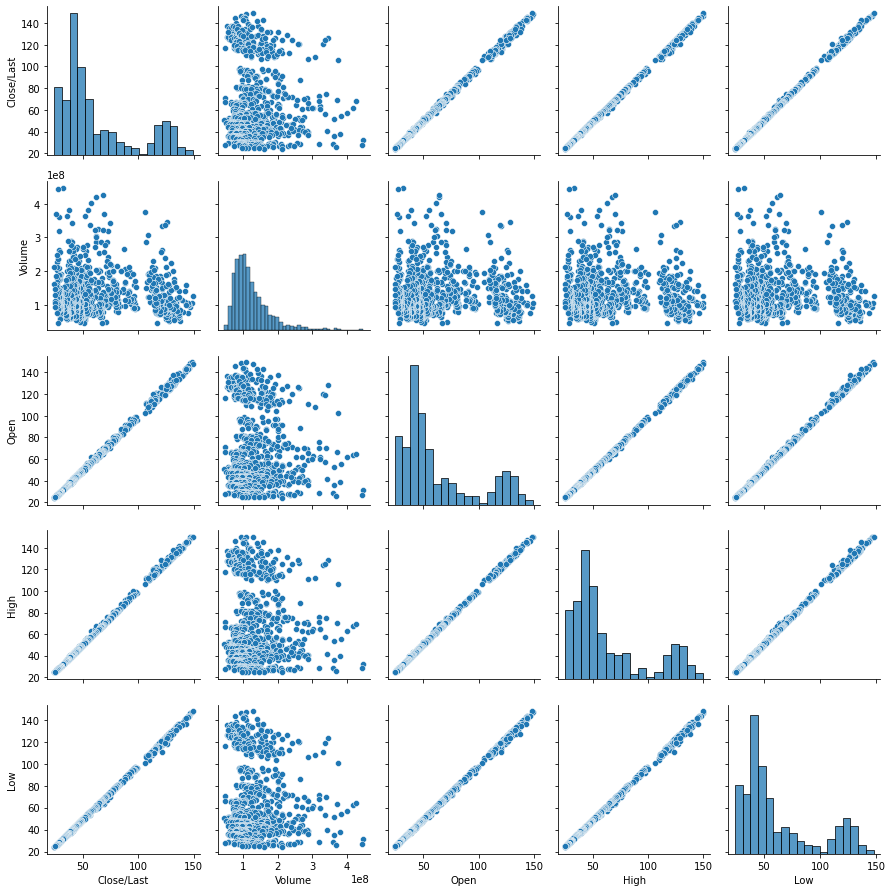

In [10]:
sns.pairplot(apple)
plt.tight_layout()

In [11]:

apple['Date'] = pd.to_datetime(apple['Date'])
apple.set_index('Date',inplace=True)

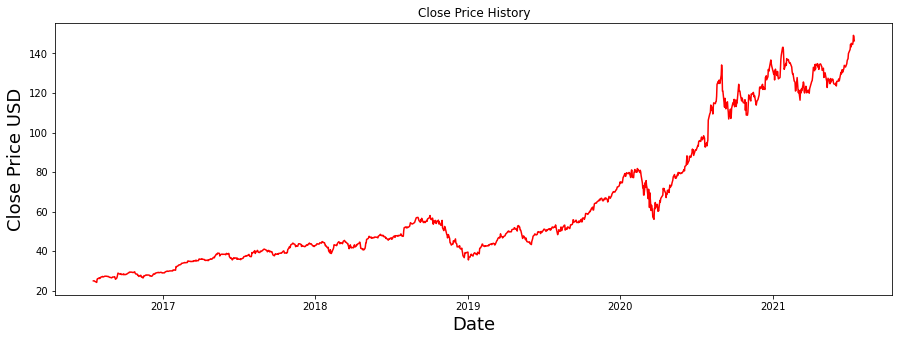

In [13]:
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(apple['Close/Last'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

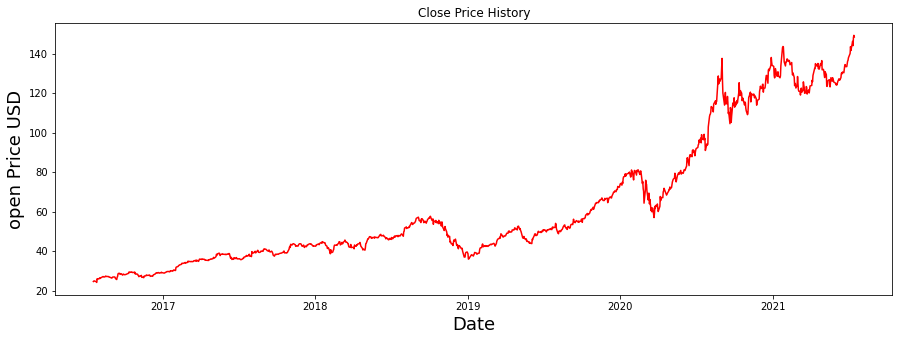

In [14]:
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.plot(apple['Open'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('open Price USD', fontsize = 18)
plt.show()

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(apple)
scaled_data

array([[0.97791647, 0.1189428 , 0.993762  , 0.9980878 , 0.98543454],
       [0.99463914, 0.15270452, 1.        , 1.        , 0.99522576],
       [1.        , 0.20304155, 0.99088292, 0.99657398, 1.        ],
       ...,
       [0.00656105, 0.14786786, 0.00639795, 0.00501952, 0.0067163 ],
       [0.00640102, 0.12345637, 0.00551823, 0.00406342, 0.00598802],
       [0.00632101, 0.24983745, 0.00383877, 0.00430245, 0.00445056]])

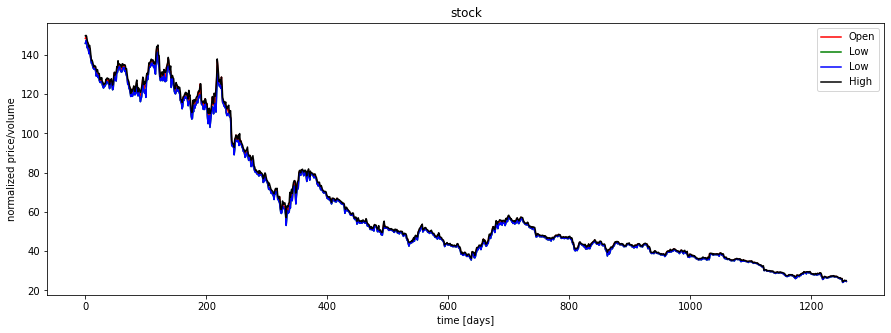

In [15]:
plt.figure(figsize=(15, 5));
plt.plot(apple.Open.values, color='red', label='Open')
plt.plot(apple.Low.values, color='green', label='Low')
plt.plot(apple.Low.values, color='blue', label='Low')
plt.plot(apple.High.values, color='black', label='High')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [16]:
apple.drop(['Volume'],1,inplace=True)

In [17]:
apple.head()

,Close/Last,Open,High,Low
Date,,,,
2021-07-16,146.39,148.46,149.76,145.88
2021-07-15,148.48,149.24,150.00,147.09
2021-07-14,149.15,148.10,149.57,147.68
2021-07-13,145.64,144.03,147.46,143.63
2021-07-12,144.50,146.21,146.32,144.00


In [183]:
apple.isnull().sum()

Close/Last    0
Open          0
High          0
Low           0
dtype: int64

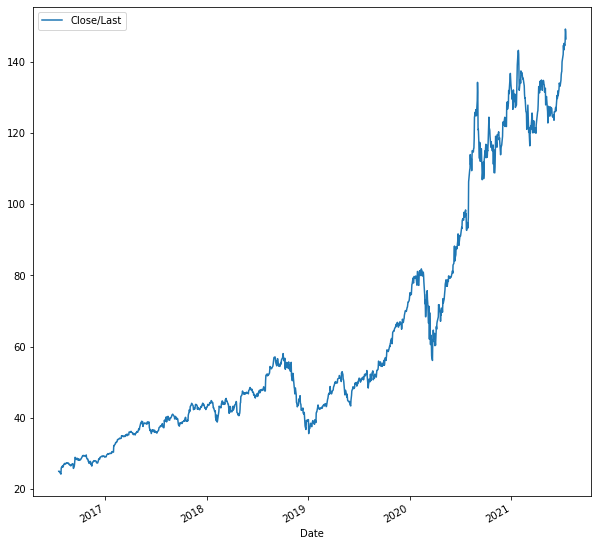

In [92]:
plots = apple[[ 'Close/Last']].plot(subplots=True, figsize=(10, 10))
plt.show()

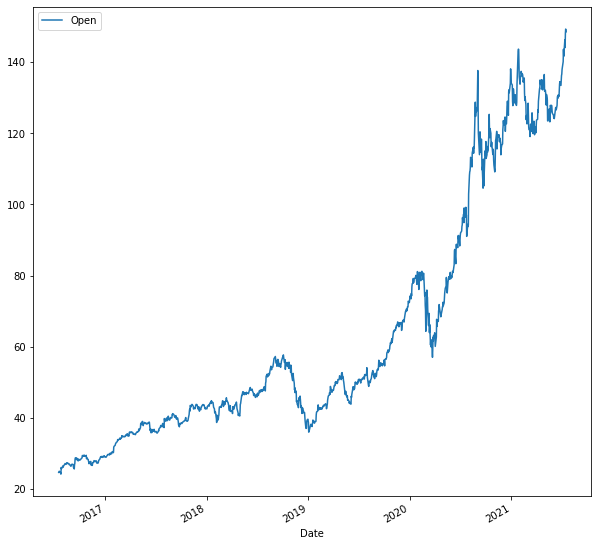

In [91]:
plots = apple[[ 'Open']].plot(subplots=True, figsize=(10, 10))
plt.show()

In [23]:
apple.rename(columns = str.upper , inplace = True)

In [24]:
apple.head()

,CLOSE/LAST,OPEN,HIGH,LOW
Date,,,,
2021-07-16,146.39,148.46,149.76,145.88
2021-07-15,148.48,149.24,150.00,147.09
2021-07-14,149.15,148.10,149.57,147.68
2021-07-13,145.64,144.03,147.46,143.63
2021-07-12,144.50,146.21,146.32,144.00


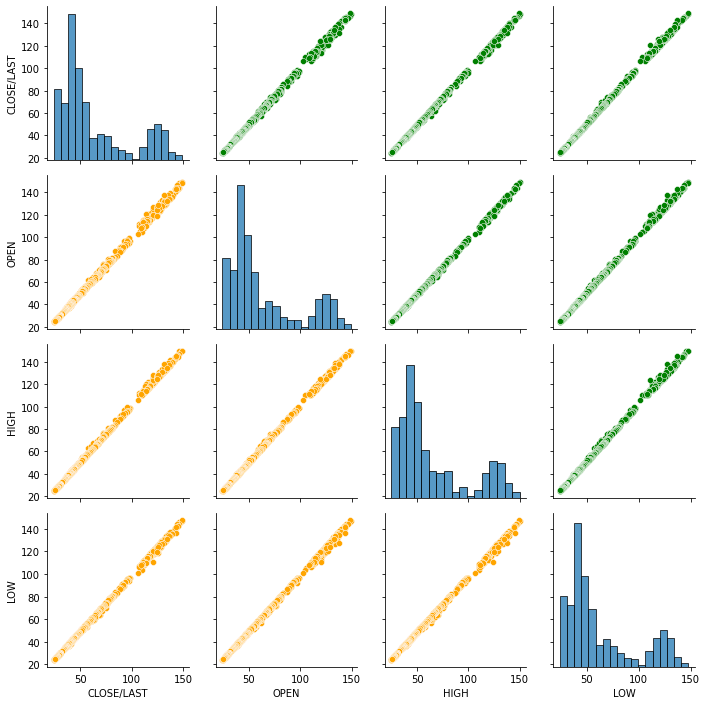

In [29]:
color = sns.PairGrid(apple)
color.map_upper(sns.scatterplot,color = 'green')
color.map_lower(sns.scatterplot,color = 'orange')
color.map_diag(sns.histplot)

<AxesSubplot:>

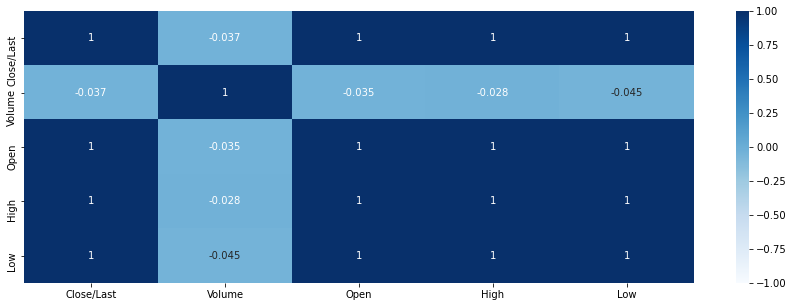

In [158]:

plt.figure(figsize=(15,5))

sns.heatmap(apple.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Blues')

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

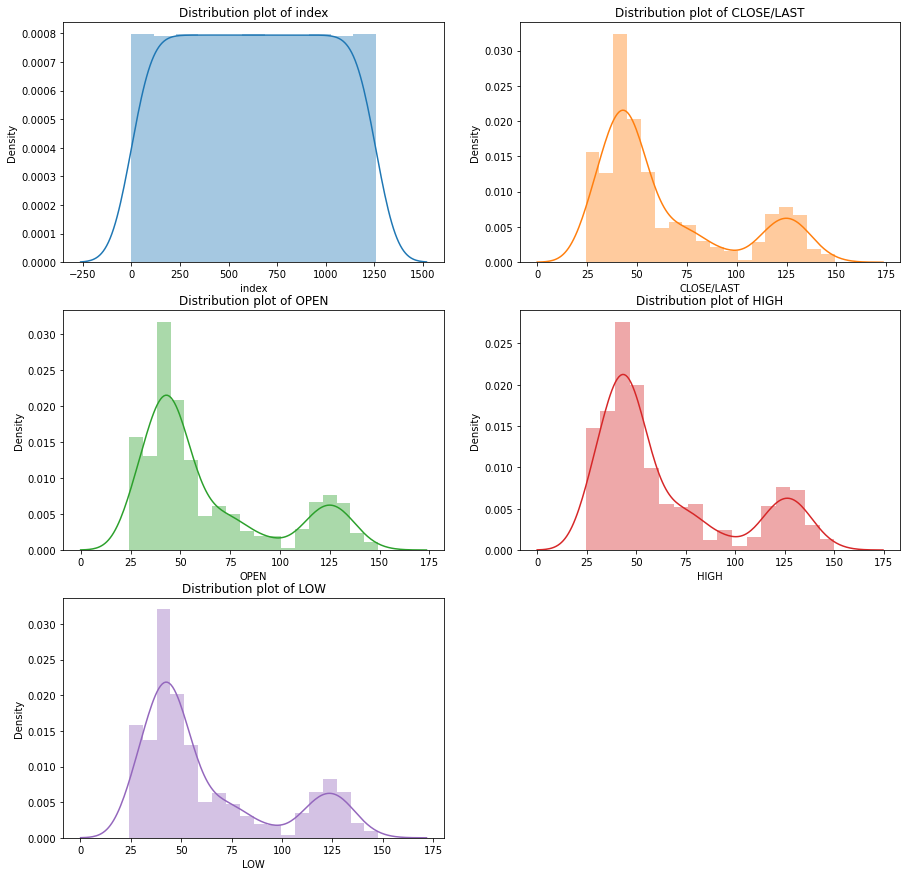

In [34]:

plt.figure(figsize=(15,15))        
for i in enumerate(apple):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(x = apple[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Distribution plot of {i[1]}')

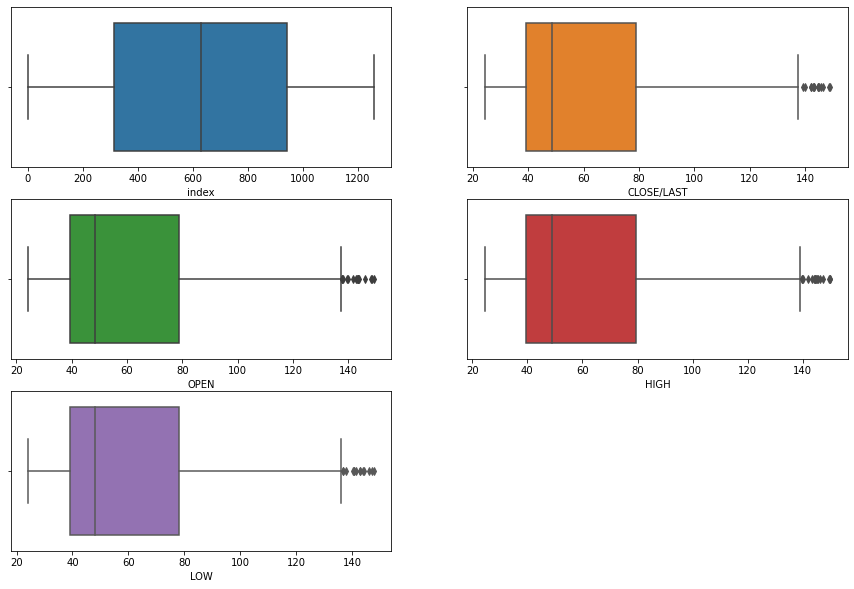

In [36]:
plt.figure(figsize=(15,10))         #creating Box plots of various attributes
for i in enumerate(apple):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(x = apple[i[1]] , color = base_color)
    plt.xlabel(i[1]);

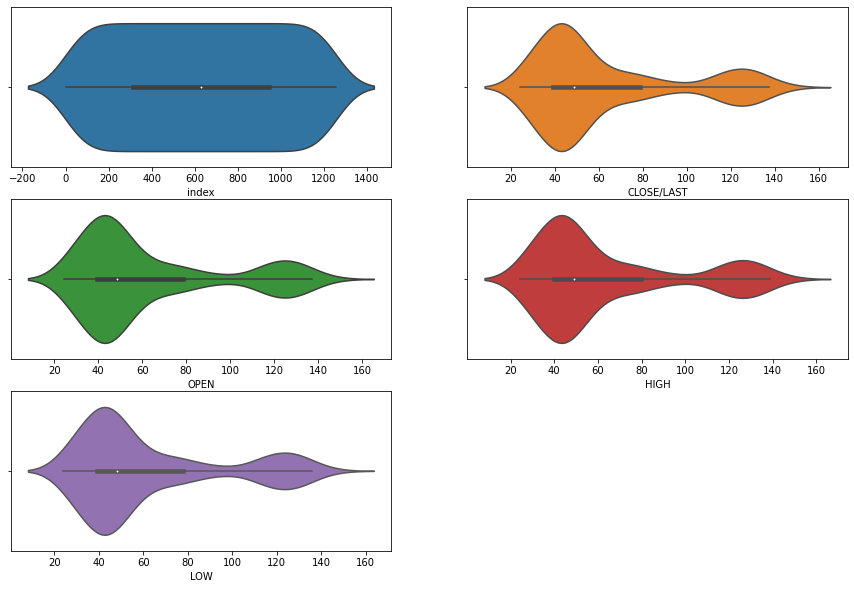

In [37]:
plt.figure(figsize=(15,10))         #creating Violin plots of various attributes
for i in enumerate(apple):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.violinplot(x = apple[i[1]] , color = base_color)
    plt.xlabel(i[1]);

<AxesSubplot:>

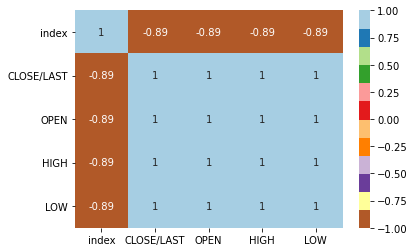

In [40]:
sns.heatmap(apple.corr() , vmin = -1 , vmax = 1 , annot = True , cmap = 'Paired_r')

In [48]:
X=apple.loc[:,apple.columns!='CLOSE/LAST']
y=apple['CLOSE/LAST']

In [133]:
X

,index,OPEN,HIGH,LOW
Date,,,,
2021-07-16,0,148.46,149.76,145.88
2021-07-15,1,149.24,150.00,147.09
2021-07-14,2,148.10,149.57,147.68
2021-07-13,3,144.03,147.46,143.63
2021-07-12,4,146.21,146.32,144.00
...,...,...,...,...
2016-07-22,1254,24.82,24.82,24.58
2016-07-21,1255,24.96,25.25,24.78
2016-07-20,1256,25.00,25.12,24.93


In [33]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1007, 4) (252, 4) (1007,) (252,)


In [35]:
from sklearn.preprocessing import StandardScaler


In [36]:
sc=StandardScaler

In [37]:

sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
X_train_std

array([[ 1.51959395,  1.51507352,  1.55387809],
       [-0.09125822, -0.10190098, -0.07837856],
       [-0.36788102, -0.35048841, -0.35860195],
       ...,
       [-1.0297267 , -1.02340879, -1.02822283],
       [-0.36700285, -0.37130038, -0.35622214],
       [-0.26952625, -0.26001415, -0.26013705]])

In [38]:

from sklearn.svm import SVR
svr = SVR(kernel='linear', C = 22)

In [39]:
svr.fit(X_train_std,y_train)

SVR(C=22, kernel='linear')

In [40]:
y_train_pred=svr.predict(X_train_std)
y_test_pred=svr.predict(X_test_std)

In [41]:
y_train_pred

array([116.21653168,  60.58761715,  51.85118637, ...,  28.78062102,
        51.31084694,  54.98699764])

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:

mean_squared_error(y_test,y_test_pred)

0.2286425446779588

In [44]:

r2_score(y_train,y_train_pred)

0.9997301500190642

In [45]:
y_test

Date
2021-07-09    145.11
2019-07-31     53.26
2021-05-03    132.54
2017-08-15     40.40
2020-10-19    115.98
               ...  
2017-01-09     29.75
2021-06-02    125.06
2019-12-02     66.04
2021-04-15    134.50
2018-07-27     47.74
Name: CLOSE/LAST, Length: 252, dtype: float64

In [46]:

y_test_pred

array([144.98877002,  54.15910544, 133.49748205,  40.38218072,
       117.14191104, 131.1754452 ,  71.29831801,  49.87846917,
        80.27954935,  49.98586215,  42.68078414,  56.25961716,
        43.67487751,  55.00222557,  51.81096314,  38.36533905,
        43.55315881,  27.19110675, 126.18044929,  26.03381375,
        43.68919047, 127.88509665,  55.27090298,  50.85058498,
        27.49790448, 114.26192892,  42.23256868,  38.42268699,
        54.61434218,  41.21581651, 114.98680289,  40.72718432,
        34.01236373, 123.52955801,  43.10697724,  38.28084696,
        44.59975664,  38.17701538,  52.96815588,  70.66123056,
        89.42316792,  53.29881636,  35.81573396,  29.42165082,
        44.29267891, 148.23589834,  46.44741105,  41.22010788,
       132.39534819,  47.88637451,  38.33297285, 110.73395112,
        29.32753089, 133.94770779,  38.08931408,  59.20183494,
        55.04780585,  32.93039074, 127.12117795, 124.06755763,
        74.84568717,  46.90845716,  35.91456121,  59.06

In [60]:
apple.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
07/16/2021,146.39,93251430,148.46,149.76,145.88
07/15/2021,148.48,106820300,149.24,150.00,147.09
07/14/2021,149.15,127050800,148.10,149.57,147.68
07/13/2021,145.64,100827100,144.03,147.46,143.63
07/12/2021,144.50,76299720,146.21,146.32,144.00


In [99]:

df1=apple.reset_index()['Close/Last']

In [101]:
df1

0       146.39
1       148.48
2       149.15
3       145.64
4       144.50
         ...  
1254     24.66
1255     24.86
1256     24.99
1257     24.97
1258     24.96
Name: Close/Last, Length: 1259, dtype: float64

In [102]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [104]:
print(df1)

[[0.97791647]
 [0.99463914]
 [1.        ]
 ...
 [0.00656105]
 [0.00640102]
 [0.00632101]]


In [105]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [106]:
training_size,test_size

(818, 441)

In [107]:
train_data

array([[0.97791647],
       [0.99463914],
       [1.        ],
       [0.97191551],
       [0.96279405],
       [0.96767483],
       [0.95271243],
       [0.96335414],
       [0.94295087],
       [0.92646823],
       [0.90494479],
       [0.90246439],
       [0.89742359],
       [0.8850216 ],
       [0.87165947],
       [0.87405985],
       [0.87638022],
       [0.87862058],
       [0.86517843],
       [0.85045607],
       [0.86109778],
       [0.84797568],
       [0.84389502],
       [0.8506161 ],
       [0.82557209],
       [0.8156505 ],
       [0.82381181],
       [0.82069131],
       [0.81397024],
       [0.81389022],
       [0.79508721],
       [0.80724916],
       [0.80100816],
       [0.80364858],
       [0.80900944],
       [0.82157145],
       [0.82197152],
       [0.82357177],
       [0.81020963],
       [0.82525204],
       [0.80428869],
       [0.80556889],
       [0.81693071],
       [0.82637222],
       [0.80652904],
       [0.78892623],
       [0.81405025],
       [0.821

In [131]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
         a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [133]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [135]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [136]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [138]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [140]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [141]:

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.0279 - val_loss: 3.2842e-04
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0141 - val_loss: 0.0020
Epoch 3/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0049 - val_loss: 0.0053
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 2.9725e-04 - val_loss: 0.0104
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0014 - val_loss: 0.0137
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0043 - val_loss: 0.0133
Epoch 7/100
1/1 [==============================] - ETA: 0s - loss: 0.003 - 0s 21ms/step - loss: 0.0037 - val_loss: 0.0110
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - val_loss: 0.0086
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 3.8207e-04 - val_loss: 0.0066
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 3.5258e-07 

In [143]:
import tensorflow as tf

In [144]:
tf.__version__

'2.3.0'

In [145]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [146]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [147]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43.09375309375672

In [148]:
math.sqrt(mean_squared_error(ytest,test_predict))

37.21433643311153

In [149]:
len(test_data)

441

In [150]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [152]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [153]:
temp_input

[0.026564250280044777,
 0.02488398143702991,
 0.02648423747799647,
 0.02560409665546487,
 0.027684429508721353,
 0.029524723955832916,
 0.029764762361977892,
 0.030244839174267846,
 0.02912465994559127,
 0.030244839174267846,
 0.030084813570171204,
 0.026804288686189753,
 0.026564250280044777,
 0.02664426308209311,
 0.02088334133461353,
 0.018082893262922034,
 0.02352376380220833,
 0.022243558969435084,
 0.02840454472715631,
 0.02872459593534965,
 0.027444391102576404,
 0.024323891822691623,
 0.0263242118738998,
 0.0298447751640262,
 0.02960473675788125,
 0.03368538966234594,
 0.034085453672587585,
 0.035605696911505835,
 0.03784605536885899,
 0.043126900304048615,
 0.041926708273323704,
 0.039846375420067165,
 0.04072651624259879,
 0.04088654184669546,
 0.04160665706513042,
 0.04176668266922706,
 0.041926708273323704,
 0.04056649063850212,
 0.041366618658985416,
 0.03928628580572888,
 0.038726196191390616,
 0.03480556889102254,
 0.034405504880780896,
 0.03272523603776603,
 0.032645223

In [154]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10362361]
101
1 day input [0.02488398 0.02648424 0.0256041  0.02768443 0.02952472 0.02976476
 0.03024484 0.02912466 0.03024484 0.03008481 0.02680429 0.02656425
 0.02664426 0.02088334 0.01808289 0.02352376 0.02224356 0.02840454
 0.0287246  0.02744439 0.02432389 0.02632421 0.02984478 0.02960474
 0.03368539 0.03408545 0.0356057  0.03784606 0.0431269  0.04192671
 0.03984638 0.04072652 0.04088654 0.04160666 0.04176668 0.04192671
 0.04056649 0.04136662 0.03928629 0.0387262  0.03480557 0.0344055
 0.03272524 0.03264522 0.03168507 0.03272524 0.03096495 0.03456553
 0.03280525 0.03240518 0.03208513 0.03592575 0.0337654  0.0337654
 0.03384542 0.03648584 0.03776604 0.03016483 0.02256361 0.0175228
 0.01288206 0.01768283 0.02336374 0.02200352 0.02208353 0.02008321
 0.01880301 0.01864298 0.02024324 0.02056329 0.02176348 0.02272364
 0.02432389 0.02368379 0.02536406 0.02480397 0.02504401 0.02536406
 0.0256041  0.02296367 0.0224836  0.02264362 0.02424388 0.02336374
 0.02160346 0.01840294 0.01824292 0.

In [155]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [53]:
pip install -U -q segmentation-models


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip uninstall keras -y

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0


In [6]:
!pip uninstall keras-nightly -y

In [ ]:
!pip uninstall keras-Preprocessing -y

In [7]:
!pip uninstall keras-vis -y

In [9]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.3.0



  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\anaconda\\Lib\\site-packages\\~cipy\\linalg\\cython_blas.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [10]:
!pip install tensorflow==2.3.0

  Using cached tensorflow-2.3.0-cp38-cp38-win_amd64.whl (342.5 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0


In [11]:
!pip install keras==2.4

  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4